In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/archive (1).zip')

In [ ]:
df.shape

(569, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [ ]:
from sklearn.model_selection import train_test_split

# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                df.drop('diagnosis', axis=1),
                df['diagnosis'],
                test_size=0.2,
                random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
import pandas as pd # Make sure Pandas has been imported
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a Pandas DataFrame called 'df'
# Split data before imputation to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('diagnosis', axis=1),
    df['diagnosis'],
    test_size=0.2,
    random_state=42
)

# Create an imputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Continue with scaling and model training
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)  # Use transform, not fit_transform, for the test data

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[69  2]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
!pip install scikit-learn # Install scikit-learn if not already installed

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # Import accuracy_score

# ... (rest of your code) ...

knn_model_acc = accuracy_score(y_test, predictions)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc)

Accuracy of K Neighbors Classifier Model is:  0.9649122807017544


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
predictions2 = rfc.predict(X_test)

In [ ]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions2))
print("\n")
print(classification_report(y_test, predictions2))

Confusion Matrix: 
 [[70  1]
 [ 3 40]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
rfc_acc = accuracy_score(y_test, predictions2)
print("Accuracy of Random Forests Model is: ", rfc_acc)

Accuracy of Random Forests Model is:  0.9649122807017544


In [ ]:
from sklearn.svm import SVC

svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, y_train)
predictions3 = svc_model.predict(X_test)

In [ ]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions3))
print("\n")
print(classification_report(y_test, predictions3))

Confusion Matrix: 
 [[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
svc_acc = accuracy_score(y_test, predictions3)
print("Accuracy of SVC model is: ", svc_acc)

Accuracy of SVC model is:  0.9824561403508771


<Axes: >

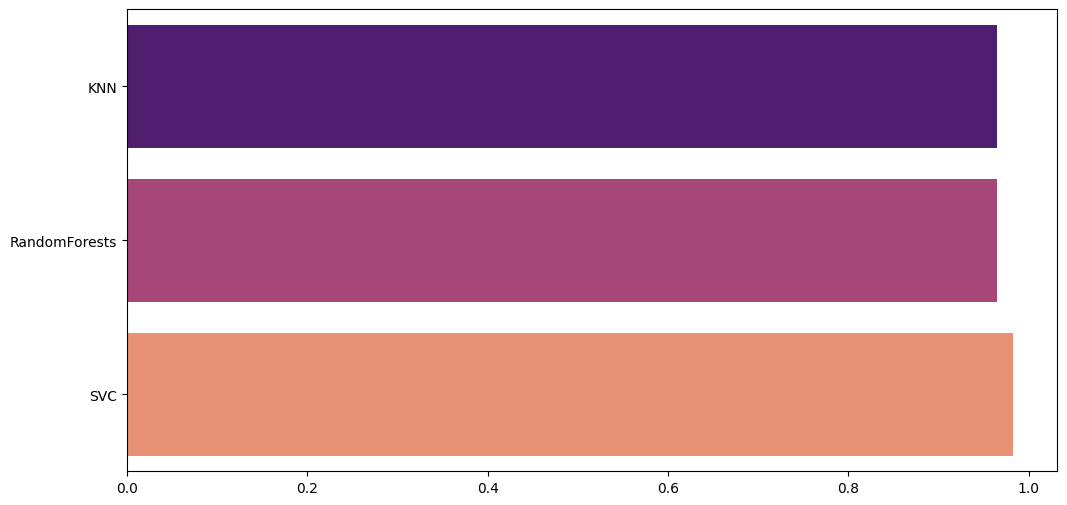

In [ ]:
plt.figure(figsize=(12,6))
model_acc = [knn_model_acc, rfc_acc, svc_acc] # Change svm_acc to svc_acc
model_name = ['KNN', 'RandomForests', 'SVC']
sns.barplot(x= model_acc, y=model_name, palette='magma')

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Unzipping the uploaded file
import zipfile
import os

uploaded_file = '/content/archive (1).zip'
extract_folder = '/content/data'

with zipfile.ZipFile(uploaded_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Load the dataset
# Assuming the unzipped folder contains a CSV file; adjust the filename as necessary
data_file = [f for f in os.listdir(extract_folder) if f.endswith('.csv')][0]
file_path = os.path.join(extract_folder, data_file)

df = pd.read_csv(file_path)

# Inspect the dataset
print(df.head())



         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Import LabelEncoder to convert categorical target to numerical
from sklearn.preprocessing import LabelEncoder


# Example: Load the dataset
# Replace 'your_dataset.csv' with your actual dataset file name
df = pd.read_csv('/content/archive (1).zip')  # Ensure the file path is correct if it's in a different directory

# Inspect the dataset to identify column names
print(df.columns) # Print the actual column names in your dataset

# Replace 'feature_column' and 'target_column' with your actual column names
# Example: Assuming 'radius_mean' is a feature and 'diagnosis' is the target
X = df[['radius_mean']]  # Use the actual name of your feature column(s)
y = df['diagnosis']    # Use the actual name of your target column

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your target variable and transform it
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
Mean Squared Error: 0.09385109288014665
Model Coefficients: [0.09823629]
Model Intercept: -1.0154354797965857
